In [2]:
from bs4 import BeautifulSoup
import requests
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd


In [3]:
#URL specific year
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=100&type=2&
#season=2019&month=0&season1=2019&ind=0&team=0&rost=0&
#age=0&filter=&players=0&startdate=&enddate=

#URL specific year
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=100&type=2&
#season=2018&month=0&season1=2018&ind=0&team=0&rost=0&
#age=0&filter=&players=0&startdate=&enddate=

# URL same year, different page 
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=100&type=2&
#season=2018&month=0&season1=2018&ind=0&team=0&rost=0&
#age=0&filter=&players=0&startdate=&enddate=&page=2_30






In [4]:

import pandas as pd

# lists for page unique page
# pages[i] points to page number and and number of players per page
pages = ['1_50','2_50','3_50','4_50','5_50','6_50','7_50','8_50']
# years[i] points to stats for specific year 
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
i = 0
j = 1
a = []

# creating a list that contains index's for searches in html
# locates name of player 
while i < 50:
    a.append(j)
    j = j + 18
    i += 1

# making individual data frames for each page on specific year 
# also creating necesaary selinium and requests variables 
def make_DataFrame(suffix_page,suffix_year,a):
    DF = []
    DFY = []
    for l in range(len(suffix_year)):
        for j in range(len(suffix_page)):
            
            # path to the chromedriver executable
            chromedriver = "/Applications/chromedriver" 
            os.environ["webdriver.chrome.driver"] = chromedriver
            
            # defining Parent URL
            A = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=100&type=2&'
            B = 'season={}&month=0&season1={}&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=&'
            C = 'enddate=&page={}'
            URL = A+B+C
            url = URL.format(suffix_year[l],suffix_year[l],suffix_page[j])
            
       
   
            response = requests.get(url)
            page = response.text
            soup = BeautifulSoup(page, "lxml")
        
            driver = webdriver.Chrome(chromedriver)
            driver.get(url)

            # getting baseball reference web page 
            driver.page_source[:]
            # defining a soup object 
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            
            # drilling through html code for specific url address
            GR = soup.find_all(class_ = 'grid_line_regular')
            names = []
            k = 3
            w = 18
            stats = []
            individual = []
            for j in range(50):
                individual = []
                for i in range(k,w):
                    individual.append(GR[i].text)
                stats.append(individual)
                k = w + 3
                w = w + 18
            

            for i in range(len(a)):
                names.append(GR[a[i]].text)
   
            
            page = {}
            for i in range(len(stats)):
                page[i] = stats[i]

            # defining dataframe 
            PBR = pd.DataFrame.from_dict(page, orient = 'index',
                            columns = ['BABIP','GB/FB','LD%','GB%','FB%','IFFB%','HR/FB',
                                          'IFH','IFH%','BUH','BUH%','Cent%','Oppo%','Med%','Hard%'])
            PBR['NAME'] = names                             
            DF.append(PBR)
        DFY.append(DF)
    return DFY


In [6]:
#Frames = make_DataFrame(pages,years,a)
FRAMES = make_DataFrame(pages,years,a)

In [7]:
# pickling for later 
FRAMES.to_pickle('data/survey_data.pkl')

AttributeError: 'list' object has no attribute 'to_pickle'

In [8]:
# collecting data frames by page# and then concating them all together 
Seasons = []
k = 0
w = 8
j = 0
while j <= 8:
    Season = pd.concat([FRAMES[0][i] for i in range(k,w)])
    Seasons.append(Season)
    k = w
    w = w + 8
    j += 1
    
# see if we got what we need 
Seasons[8].shape


(400, 16)

In [63]:
ALL_DATA = pd.concat([Seasons[i] for i in range(9)])

In [64]:
# PAIRING DOWN MY DATA SET TO THE FEATURES AND TARGET ID LIKE TO INCLUDE 
ALL_DATA = ALL_DATA[['NAME','BABIP','LD%','GB%','FB%','Oppo%','Hard%','IFH']]

In [65]:
# checking out data 
ALL_DATA.head()
ALL_DATA.shape

(3600, 8)

In [66]:
ALL_DATA.reset_index(inplace=True)

In [67]:
del ALL_DATA['index']

In [68]:
ALL_DATA.head()

,NAME,BABIP,LD%,GB%,FB%,Oppo%,Hard%,IFH
0,Jim Thome,.310,21.4%,40.8%,37.8%,24.5%,45.9%,3
1,Joey Votto,.361,20.0%,45.2%,34.8%,29.4%,40.0%,5
2,Ramon Castro,.293,20.0%,42.2%,37.8%,15.1%,38.7%,2
3,Giancarlo Stanton,.330,16.5%,43.0%,40.5%,22.8%,42.2%,7
4,Jose Bautista,.233,14.4%,31.1%,54.5%,18.8%,39.6%,12


In [69]:
# checking feature and target types. Need to change all but name to float 
ALL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    3600 non-null   object
 1   BABIP   3600 non-null   object
 2   LD%     3600 non-null   object
 3   GB%     3600 non-null   object
 4   FB%     3600 non-null   object
 5   Oppo%   3600 non-null   object
 6   Hard%   3600 non-null   object
 7   IFH     3600 non-null   object
dtypes: object(8)
memory usage: 225.1+ KB


In [70]:
# stripping percent sign then converting to float 
ALL_DATA['BABIP'] = ALL_DATA['BABIP'].astype('float')
ALL_DATA['Hard%'] = ALL_DATA['Hard%'].str.strip('%').astype('float') / 100 
ALL_DATA['Oppo%'] = ALL_DATA['Oppo%'].str.strip('%').astype('float') / 100
ALL_DATA['GB%'] = ALL_DATA['GB%'].str.strip('%').astype('float') / 100
ALL_DATA['LD%'] = ALL_DATA['LD%'].str.strip('%').astype('float') / 100
ALL_DATA['FB%'] = ALL_DATA['FB%'].str.strip('%').astype('float') / 100
ALL_DATA['IFH'] = ALL_DATA['IFH'].str.strip('%').astype('float') / 100


In [71]:
#checking info again to make sure everthing worked
ALL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    3600 non-null   object 
 1   BABIP   3600 non-null   float64
 2   LD%     3600 non-null   float64
 3   GB%     3600 non-null   float64
 4   FB%     3600 non-null   float64
 5   Oppo%   3600 non-null   float64
 6   Hard%   3600 non-null   float64
 7   IFH     3600 non-null   float64
dtypes: float64(7), object(1)
memory usage: 225.1+ KB


In [72]:
LD = ALL_DATA.groupby(['NAME'], as_index=False)['LD%'].mean()
Oppo = ALL_DATA.groupby(['NAME'], as_index=False)['Oppo%'].mean()
GB = ALL_DATA.groupby(['NAME'], as_index=False)['GB%'].mean()
Hard = ALL_DATA.groupby(['NAME'], as_index=False)['Hard%'].mean()
FB = ALL_DATA.groupby(['NAME'], as_index=False)['FB%'].mean()
IFH = ALL_DATA.groupby(['NAME'], as_index=False)['IFH'].mean()
BABIP = ALL_DATA.groupby(['NAME'], as_index=False)['BABIP'].mean()


In [73]:
#BABIP = ALL_DATA.groupby(['NAME'], as_index=False)['BABIP'].mean()


In [74]:
merge_1 = pd.merge(left=BABIP, right=LD, left_on='NAME', right_on='NAME')

In [75]:
merge_2 = pd.merge(left = merge_1, right = GB, left_on = 'NAME', right_on = 'NAME')

In [76]:
merge_3 = pd.merge(left = merge_2 , right = Oppo, left_on = 'NAME',right_on = 'NAME')

In [77]:
merge_4 = pd.merge(left = merge_3 , right = Hard, left_on = 'NAME',right_on = 'NAME')

In [78]:
merge_5 = pd.merge(left = merge_4 , right = FB, left_on = 'NAME',right_on = 'NAME')

In [79]:
merge_6 = pd.merge(left = merge_5 , right = IFH, left_on = 'NAME',right_on = 'NAME')

In [80]:
MODEL = merge_6.set_index('NAME')

In [90]:
MODEL.head()
# pickling for later 
MODEL.to_pickle('MODELDF.pkl')

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [83]:
MODEL.corr()

,BABIP,LD%,GB%,Oppo%,Hard%,FB%,IFH
BABIP,1.000000,0.478505,0.159262,0.259323,0.246127,-0.370500,0.314983
LD%,0.478505,1.000000,-0.181948,0.250456,0.134665,-0.270332,-0.008644
GB%,0.159262,-0.181948,1.000000,0.317229,-0.335825,-0.897497,0.278924
Oppo%,0.259323,0.250456,0.317229,1.000000,-0.243644,-0.422989,0.111871
Hard%,0.246127,0.134665,-0.335825,-0.243644,1.000000,0.268432,-0.091765
FB%,-0.370500,-0.270332,-0.897497,-0.422989,0.268432,1.000000,-0.269496
IFH,0.314983,-0.008644,0.278924,0.111871,-0.091765,-0.269496,1.000000


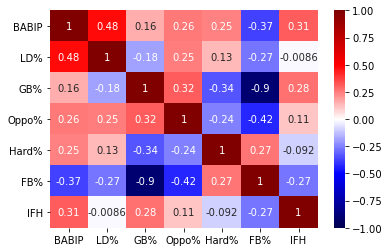

In [84]:
sns.heatmap(MODEL.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

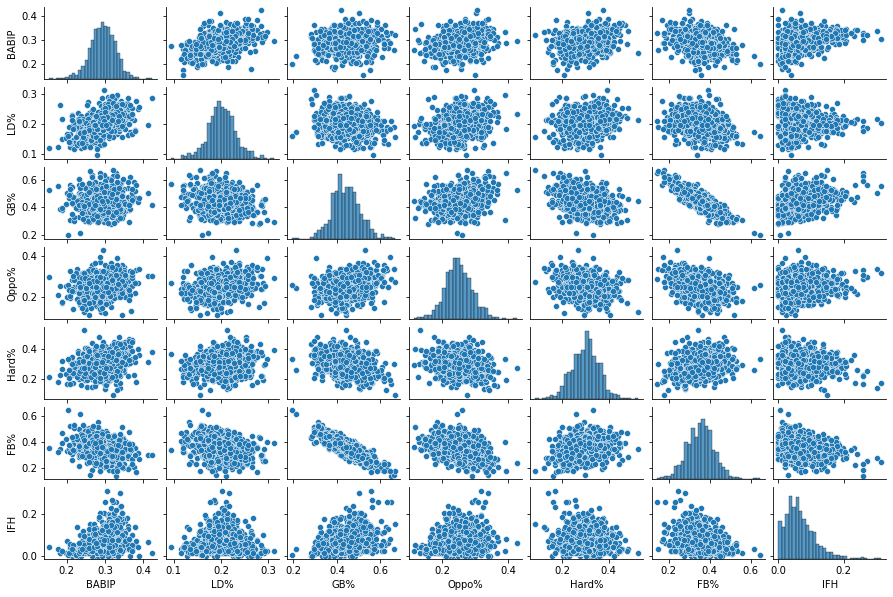

In [85]:
sns.pairplot(MODEL, height=1.2, aspect=1.5);

In [88]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# regular linear regression

y = MODEL.iloc[0:,0:1]
LR = LinearRegression()


# Split data , save 20% for testing 
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.20, random_state=37)

# Instantiate model
LR = LinearRegression()

# split data again, with the 80% split from above. 
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = .25, random_state = 57)

# Fit train Model
LR.fit(X_train, y_train)
Val_score = LR.score(X_val,y_val)
print('R^2 on validation: ', Val_score)

# Fit test model
LR.fit(X,y)
# finding R^2 on my 20 % test set that I put away in the begining
print('R^2 on test: ', LR.score(X_test, y_test))
y_pred = LR.predict(X_test)
MSE_1 = mean_squared_error(y_test, y_pred)
MAE_1 = mean_absolute_error(y_test, y_pred)

# MSE and MAE results 

print("MEAN SQUARED ERROR: ", MSE_1)
print("MEAN ABSOLUTE ERROR: " ,MAE_1)

# get importance
importance = LR.coef_
# summarize feature importance
coefficients = importance.tolist()
c_list = [ coefficients[0][i] for i in range(len(coefficients[0]))]
COL = list(X.columns)

# making a coefficient dictionary to use for my data frame 
coef_dict = {COL[0]:c_list[0] ,COL[1]:c_list[1] ,COL[2]:c_list[2] ,COL[3]:c_list[3],COL[4]:c_list[4] ,COL[5]:c_list[5]}

#making coefficients data frame 
df_coef = pd.DataFrame([coef_dict])

# calculating predicted values for test model
y_pred = LR.predict(X_test)
y1 = y_pred.tolist()
Y_PRED = [y1[i][0] for i in range(len(y1))]

# putting predicted babib and actual babip in data frame for plotting in seaborn 
y_test['PREDICTED_BABIP'] = Y_PRED

df_coef.head()

R^2 on validation:  0.46143755242479745
R^2 on test:  0.46796751933497016
MEAN SQUARED ERROR:  0.000668654651161886
MEAN ABSOLUTE ERROR:  0.018784711829863684


,LD%,GB%,Oppo%,Hard%,FB%,IFH
0,1.389267,0.99941,0.080604,0.168631,0.889345,0.216998


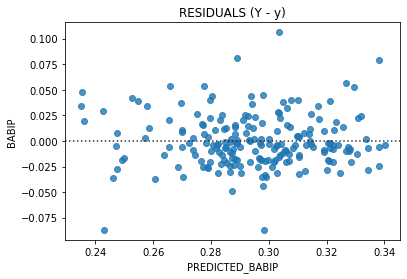

In [36]:
sns.residplot(x = 'PREDICTED_BABIP',
              y = 'BABIP',
              data = y_test)
plt.title('RESIDUALS (Y - y)')
plt.show()

In [83]:
# attempting to use gradient descent as my model driver 
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(X, y.to_numpy())
y_predict = reg.predict(X_test)

/Users/jamesgardner/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'PREDICTED BABIP VS ACTUAL BABIP')

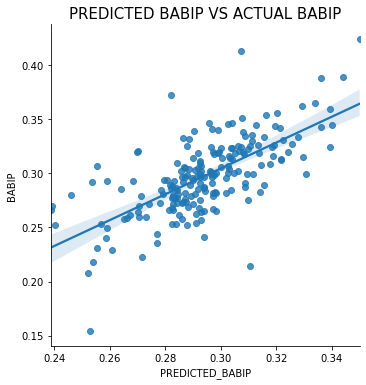

In [62]:
# plotting pred vs actual BABIP
sns.lmplot(x ='PREDICTED_BABIP', y ='BABIP', data = y_test)
plt.title("PREDICTED BABIP VS ACTUAL BABIP", size=15)


In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 

# training with polynomial features 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly = LinearRegression()

poly.fit(X_train_poly, y_train)

print(f'Degree 2 polynomial regression val R^2: {poly.score(X_val_poly, y_val):.3f}')
print(f'Degree 2 polynomial test R^2: {poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.425
Degree 2 polynomial test R^2: 0.437


In [64]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

ridge = Ridge(alpha=1)

ridge.fit(X_train_scaled, y_train)
print(f'Ridge Regression Validation R^2: {ridge.score(X_val_scaled, y_val):.3f}')
print(f'Ridge Regression Test R^2: {ridge.score(X_test_scaled,y_test)}')

#importance = ridge.coef_
# summarize feature importance
#print(importance)
#print(X.columns)


Ridge Regression Validation R^2: 0.461
Ridge Regression Test R^2: 0.46040124073874245
